# Yandex Afisha analytics

# Table of contents

1. [Project Description](#ProjectDescription)
2. [Step 1: Open data and general information](#OpenData&GeneralInfo)
3.   [* Step 1: Conclusion](#GeneranlInfoConclusion)
4. [Step 2: Make reports and calculate metrics](#PrepareData)
5. [* To Do List](#Step2ToDoList)
6. [* Product](#Product)
6.  [* Step 2: Conclusion](#Step2Conclusion)
7. [Step 3: Analyze the data](#AnalyzeData)
8. [* To Do List](#Step3ToDoList)
9.  [* Step 3: Conclusion](#Step3Conclusion)
10. [Step 4: Create User Profile for each region](#Step4UserProfile)
11. [* To Do List](#Step4ToDoList)
12.  [* Step 4: Conclusion](#Step4Conclusion)
13. [Step 5: Test the following hypotheses](#Step5Hypotheses)
14. [Step 6: Write a general conclusion](#GeneralConclusion)

### Project Description. <a name="ProjectDescription"></a>

|  Name  |  Description  |
| :----: |  :---- |
|  **Initial conditions**  | Your first task is to help optimize marketing expense.                                | 
|  **What we have**        | Server logs with data on Yandex.Afisha visits from June 2017 through May 2018. Dump file with all orders for the period. Marketing expenses statistics         |
|  **Main question of project**  |  How much money to invest and where to marketers?                               |
| **Project Description**  | [Link to Project Description](https://practicum.yandex.com/trainer/data-analyst/lesson/da301f15-cfdb-4ac1-ba36-0872df8f9cf5/task/eb50e373-a61a-4206-89a3-49095515f6a7/)    |
| **Datasets**             | [/datasets/visits_log_us.csv](https://code.s3.yandex.net/datasets/visits_log_us.csv)  |
|                          | [/datasets/orders_log_us.csv](https://code.s3.yandex.net/datasets/orders_log_us.csv)  |
|                          | [/datasets/costs_us.csv](https://code.s3.yandex.net/datasets/costs_us.csv)            |


### Step 1. Open the data file and study the general information. <a name="OpenData&GeneralInfo"></a>

In [70]:
# import all packages
import pandas as pd
import numpy as np
import random
from scipy import stats as st

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

%matplotlib inline

In [71]:
print('Pandas version library:',pd.__version__)
print('Numpy version library:', np.__version__)
print('Seaborn version library:', sns.__version__)
#print('Python version:', python.__version__)

Pandas version library: 0.25.1
Numpy version library: 1.18.5
Seaborn version library: 0.9.0


In [72]:
# connect all datasets:
df_visits = pd.read_csv('https://code.s3.yandex.net/datasets/visits_log_us.csv',
                        nrows=359400,
                        dtype={'Device': 'category'},
                        parse_dates=['End Ts','Start Ts']
                       )
df_orders = pd.read_csv('https://code.s3.yandex.net/datasets/orders_log_us.csv',
                        nrows=50415,
                        parse_dates=['Buy Ts']                        
                       )
df_costs  = pd.read_csv('https://code.s3.yandex.net/datasets/costs_us.csv',
                        nrows=2542,
                        parse_dates=['dt']                      
                       )

In [73]:
# function to determine if columns in file have null values:
def get_percent_of_na(df, num):
    count = 0; # first reset counter.
    df = df.copy() # copy dataframe in new structure.
    amount = (df.isna().sum() / df.shape[0])
    
    for column, percent in zip(amount.index, amount.values):
        num_of_nulls = df[column].isna().sum()
        if num_of_nulls == 0:
            continue
        else:
            count += 1
        print('Column {} has {:.{}%} percent of Nulls, and {} of nulls'.format(column, percent, num, num_of_nulls))
        
    if count != 0:
        print('\033[1m' + 'There are {} columns with NA.'.format(count) + '\033[0m')
    else: 
        print()
        print('\033[1m' + 'There are no columns with NA.' + '\033[0m')

In [74]:
def get_percent_of_na_table(df, num):
    df_nulls = pd.DataFrame(df.isna().sum(), columns=['Missing Values'])
    df_nulls['Percent of Nulls'] = round(df_nulls['Missing Values'] / df.shape[0], num) * 100
    return df_nulls

In [75]:
# function to display helpfull information about each file.
def get_info(df):
    print('Head:')
    display(df.head())
    print('-'*110)
    
    print('Info:')
    display(df.info())
    print('-'*110)
    
    print('Describe:')
    display(df.describe())
    display(df.describe(include=['category', 'object', 'float64']))
    print('-'*110)
    
    print('Percent of columns with nulls:')
    display(get_percent_of_na_table(df, 2))
    print('-'*110)
    
    print('Shape:')
    print(df.shape)
    print('-'*110)
    
    print('Duplicated:')
    print('\033[1m' + 'We have {} duplicated rows. \n'.format(df.duplicated().sum()) + '\033[0m')
    print('/'*110)

In [76]:
# let's use get_info function for check information for all datasets:
get_info(df_visits)

Head:


,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


--------------------------------------------------------------------------------------------------------------
Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
Device       359400 non-null category
End Ts       359400 non-null datetime64[ns]
Source Id    359400 non-null int64
Start Ts     359400 non-null datetime64[ns]
Uid          359400 non-null uint64
dtypes: category(1), datetime64[ns](2), int64(1), uint64(1)
memory usage: 11.3 MB


None

--------------------------------------------------------------------------------------------------------------
Describe:


,Source Id,Uid
count,359400.000000,3.594000e+05
mean,3.750515,9.202557e+18
std,1.917116,5.298433e+18
min,1.000000,1.186350e+13
25%,3.000000,4.613407e+18
50%,4.000000,9.227413e+18
75%,5.000000,1.372824e+19
max,10.000000,1.844668e+19


,Device
count,359400
unique,2
top,desktop
freq,262567


--------------------------------------------------------------------------------------------------------------
Percent of columns with nulls:


,Missing Values,Percent of Nulls
Device,0,0.0
End Ts,0,0.0
Source Id,0,0.0
Start Ts,0,0.0
Uid,0,0.0


--------------------------------------------------------------------------------------------------------------
Shape:
(359400, 5)
--------------------------------------------------------------------------------------------------------------
Duplicated:
We have 0 duplicated rows. 

//////////////////////////////////////////////////////////////////////////////////////////////////////////////


In [77]:
get_info(df_orders)

Head:


,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


--------------------------------------------------------------------------------------------------------------
Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
Buy Ts     50415 non-null datetime64[ns]
Revenue    50415 non-null float64
Uid        50415 non-null uint64
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB


None

--------------------------------------------------------------------------------------------------------------
Describe:


,Revenue,Uid
count,50415.000000,5.041500e+04
mean,4.999647,9.098161e+18
std,21.818359,5.285742e+18
min,0.000000,3.135781e+14
25%,1.220000,4.533567e+18
50%,2.500000,9.102274e+18
75%,4.890000,1.368290e+19
max,2633.280000,1.844617e+19


,Revenue
count,50415.000000
mean,4.999647
std,21.818359
min,0.000000
25%,1.220000
50%,2.500000
75%,4.890000
max,2633.280000


--------------------------------------------------------------------------------------------------------------
Percent of columns with nulls:


,Missing Values,Percent of Nulls
Buy Ts,0,0.0
Revenue,0,0.0
Uid,0,0.0


--------------------------------------------------------------------------------------------------------------
Shape:
(50415, 3)
--------------------------------------------------------------------------------------------------------------
Duplicated:
We have 0 duplicated rows. 

//////////////////////////////////////////////////////////////////////////////////////////////////////////////


In [78]:
get_info(df_costs)

Head:


,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


--------------------------------------------------------------------------------------------------------------
Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
source_id    2542 non-null int64
dt           2542 non-null datetime64[ns]
costs        2542 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 59.7 KB


None

--------------------------------------------------------------------------------------------------------------
Describe:


,source_id,costs
count,2542.000000,2542.000000
mean,4.857199,129.477427
std,3.181581,156.296628
min,1.000000,0.540000
25%,2.000000,21.945000
50%,4.000000,77.295000
75%,9.000000,170.065000
max,10.000000,1788.280000


,costs
count,2542.000000
mean,129.477427
std,156.296628
min,0.540000
25%,21.945000
50%,77.295000
75%,170.065000
max,1788.280000


--------------------------------------------------------------------------------------------------------------
Percent of columns with nulls:


,Missing Values,Percent of Nulls
source_id,0,0.0
dt,0,0.0
costs,0,0.0


--------------------------------------------------------------------------------------------------------------
Shape:
(2542, 3)
--------------------------------------------------------------------------------------------------------------
Duplicated:
We have 0 duplicated rows. 

//////////////////////////////////////////////////////////////////////////////////////////////////////////////


#### Step1: Conclusion <a name="GeneranlInfoConclusion"></a>

Based on the above information: 
> * The data is very clean. There are no missing values or duplicate rows.
*  

### Step 2. Make reports and calculate metrics <a name="PrepareData"></a>

#### To-Do List: <a name="Step2ToDoList"></a>

> - **Product:**
- [x] How many people use it every day, week, and month?
- [X] How many sessions are there per day? (One user might have more than one session.)
- [X] What is the length of each session?
- [X] How often do users come back?
> - **Sales:**
- [X] When do people start buying? (In KPI analysis, we're usually interested in knowing the time that elapses between registration and conversion — when the user becomes a customer. For example, if registration and the first purchase occur on the same day, the user might fall into category Conversion 0d. If the first purchase happens the next day, it will be Conversion 1d. You can use any approach that lets you compare the conversions of different cohorts, so that you can determine which cohort, or marketing channel, is most effective.)
- [X] How many orders do they make during a given period of time?
- [X] What is the average purchase size?
- [X] How much money do they bring? (LTV)
> - **Marketing:**
- [X] How much money was spent? Overall/per source/over time
- [X] How much did customer acquisition from each of the sources cost?
- [X] How worthwhile where the investments? (ROI)

#### Product <a name="Product"></a>

> - How many people use it every day, week, and month?

In [79]:
df_visits.head()

,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


In [80]:
df_visits['year']  = df_visits['Start Ts'].dt.year
df_visits['month'] = df_visits['Start Ts'].dt.month
df_visits['week']  = df_visits['Start Ts'].dt.week
df_visits['date']  = df_visits['Start Ts'].dt.date

In [81]:
# check main columns:
df_visits.head()

,Device,End Ts,Source Id,Start Ts,Uid,year,month,week,date
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,12,51,2017-12-20
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,2,8,2018-02-19
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017,7,26,2017-07-01
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,5,20,2018-05-20
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017,12,52,2017-12-27


In [82]:
# for calculate number of time active uses implement function:
def total(df, time_1, time_2, uid, filtr):
    total = (
    df.groupby([time_1, time_2])
    .agg({uid:filtr})
    .mean()
    .astype('int64')
    .values
    )
    return total

In [83]:
def xAU_df(df, time, uid, filtr):
    xAU_df = (
        df.groupby([time])
        .agg({uid:filtr})
    )
    return xAU_df

In [84]:
# DAU - the number of daily active (unique) users
# WAU - the number of weekly active users
# MAU - the number of monthly active users.
mau_total = total(df_visits, 'year', 'month', 'Uid', 'nunique')
wau_total = total(df_visits, 'year', 'week', 'Uid', 'nunique')
dau_total = total(df_visits, 'date', 'date', 'Uid', 'nunique')
print('The number of monthly active users:', mau_total)
print('The number of week active users', wau_total)
print('The number of daily active users', dau_total)

The number of monthly active users: [23228]
The number of week active users [5716]
The number of daily active users [907]


In [85]:
mau_df = xAU_df(df_visits, 'month', 'Uid', 'nunique')
wau_df = xAU_df(df_visits, 'week', 'Uid', 'nunique')
dau_df = xAU_df(df_visits, 'date', 'Uid', 'nunique')

In [88]:
def plot_xAU(xAU_total, xAU_name):
    plt.figure(figsize=(16,5))
    plt.plot(xAU_total.index, xAU_total['Uid'])
    plt.title(xAU_name)
    plt.xlabel('Time')
    plt.ylabel('Users')
    plt.show()

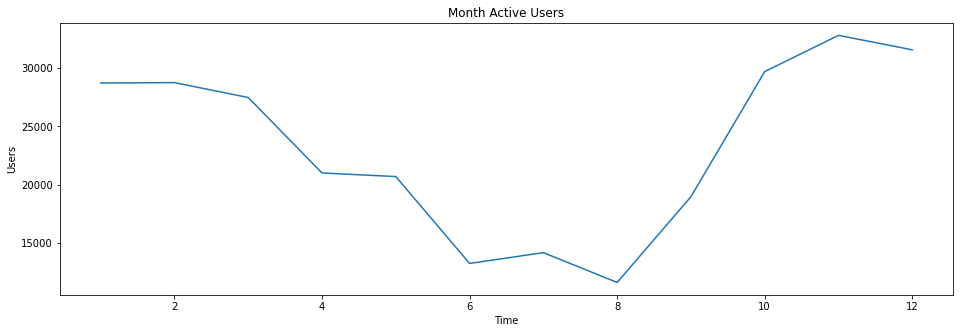

In [89]:
plot_xAU(mau_df, 'Month Active Users')

From this graph, we can see that during the summer time from June to August, user traffic drops. I think this is due to the fact that people spend more outside the computer - vacations, outdoor activities and so on.

> - How many sessions are there per day? (One user might have more than one session.)

Session per day: [987]


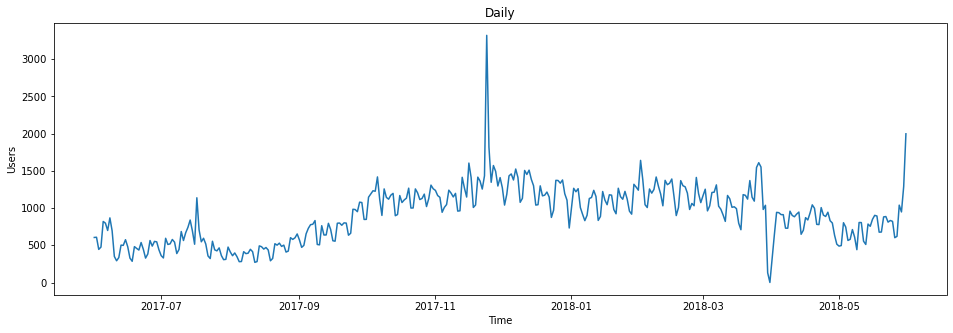

In [95]:
daily_session_total = total(df_visits, 'date', 'date', 'Uid', 'count')
daily_session_df    = xAU_df(df_visits, 'date', 'Uid', 'nunique')
print('Session per day:', daily_session_total)
plot_xAU(daily_session_df, 'Daily')

* It can be seen from this graph that the maximum peak of average daily visits occurs in December. 
* It can also be seen that the number of these daily averages begins to increase from the end of August and lasts until April-May. 
* It can be concluded that in the colder season, people begin to use the service more.

> - What is the length of each session?

In [97]:
df_visits.head()

,Device,End Ts,Source Id,Start Ts,Uid,year,month,week,date
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,12,51,2017-12-20
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,2,8,2018-02-19
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017,7,26,2017-07-01
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,5,20,2018-05-20
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017,12,52,2017-12-27


In [118]:
#df_visits['Duration'] = (df_visits['End Ts'] - df_visits['Start Ts']).astype('timedelta64[m]')
df_visits['Duration_sec'] = (df_visits['End Ts'] - df_visits['Start Ts']).dt.seconds
#df_visits['Duration_minute'] = (df_visits['End Ts'] - df_visits['Start Ts']).dt.minute
df_visits['Duration'].hist(bins=10)

AttributeError: 'TimedeltaProperties' object has no attribute 'minute'

In [103]:
# let's render this data.
def drawing_data(df, column, bins, ylabel, rmin, rmax, figX, figY):
    plt.figure(figsize=[figX,figY])
    x = df[column]
    plt.hist(
        x, 
        bins=bins,
        density=True,
        range=(rmin,rmax)
    )
    plt.title(column)
    plt.xlabel(column)
    plt.ylabel(ylabel)
    plt.show()

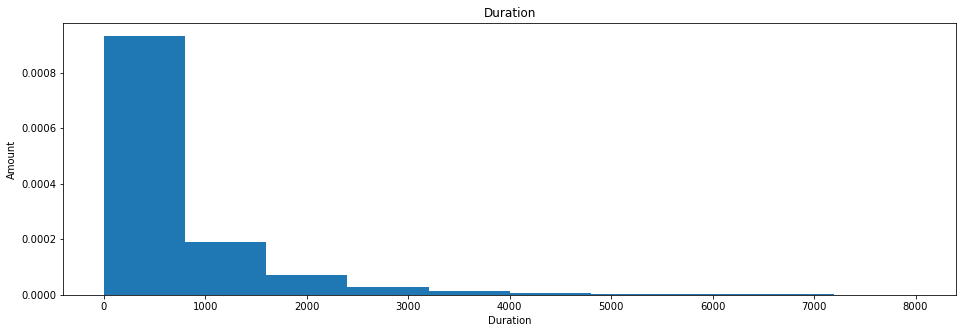

In [115]:
drawing_data(df_visits, 'Duration', 10, 'Amount', 0, 8000, 16, 5)

In [20]:
print('Duration per session:', df_visits['Duration'].mode())

Duration per session: 0    1.0
dtype: float64


> - How often do users come back?

In [21]:
sticky_factor = dau_total / mau_total * 100
print('Sticky factor:', sticky_factor)

Sticky factor: [3.90477011]


> - When do people start buying?

In [22]:
registration_date = df_visits.groupby('Uid').agg({'Start Ts': 'min'}).reset_index()
registration_date.columns = ['Uid', 'First Visit Date']
registration_date['First Visit Month'] = registration_date['First Visit Date'].astype('datetime64[M]')
display(registration_date.head())
display(df_visits.head())

,Uid,First Visit Date,First Visit Month
0,11863502262781,2018-03-01 17:27:00,2018-03-01
1,49537067089222,2018-02-06 15:55:00,2018-02-01
2,297729379853735,2017-06-07 18:47:00,2017-06-01
3,313578113262317,2017-09-18 22:49:00,2017-09-01
4,325320750514679,2017-09-30 14:29:00,2017-09-01


,Device,End Ts,Source Id,Start Ts,Uid,year,month,week,date,Duration
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,12,51,2017-12-20,18.0
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,2,8,2018-02-19,28.0
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017,7,26,2017-07-01,0.0
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,5,20,2018-05-20,24.0
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017,12,52,2017-12-27,0.0


In [23]:
df_visits['Start Ts'] = pd.to_datetime(df_visits['Start Ts'])
registration_date['Visits Month'] = df_visits['Start Ts'].astype('datetime64[M]')

In [24]:
#merge the tables with registration dates and visits on user id 
visits_registration = df_visits.merge(registration_date, on='Uid')
display(visits_registration.head())

,Device,End Ts,Source Id,Start Ts,Uid,year,month,week,date,Duration,First Visit Date,First Visit Month,Visits Month
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,12,51,2017-12-20,18.0,2017-12-20 17:20:00,2017-12-01,2018-01-01
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,2,8,2018-02-19,28.0,2018-02-19 16:53:00,2018-02-01,2018-01-01
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017,7,26,2017-07-01,0.0,2017-07-01 01:54:00,2017-07-01,2017-11-01
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,5,20,2018-05-20,24.0,2018-03-09 20:05:00,2018-03-01,2018-02-01
4,desktop,2018-03-09 20:33:00,4,2018-03-09 20:05:00,16174680259334210214,2018,3,10,2018-03-09,28.0,2018-03-09 20:05:00,2018-03-01,2018-02-01


In [25]:
#group by id to find the first purchase
display(df_orders.head())

,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


In [26]:
first_orders = df_orders.groupby('Uid').agg({'Buy Ts':'min'}).reset_index()
first_orders.columns = ['Uid','First Order Date']
first_orders['Order Date']        = pd.to_datetime(df_orders['Buy Ts'])
first_orders['First Order Month'] = first_orders['First Order Date'].astype('datetime64[M]')
first_orders['Order Month']       = first_orders['Order Date'].astype('datetime64[M]')
display(first_orders.head())

,Uid,First Order Date,Order Date,First Order Month,Order Month
0,313578113262317,2018-01-03 21:51:00,2017-06-01 00:10:00,2018-01-01,2017-06-01
1,1575281904278712,2017-06-03 10:13:00,2017-06-01 00:25:00,2017-06-01,2017-06-01
2,2429014661409475,2017-10-11 18:33:00,2017-06-01 00:27:00,2017-10-01,2017-06-01
3,2464366381792757,2018-01-28 15:54:00,2017-06-01 00:29:00,2018-01-01,2017-06-01
4,2551852515556206,2017-11-24 10:14:00,2017-06-01 07:58:00,2017-11-01,2017-06-01


In [27]:
first_orders_registration = df_visits.merge(first_orders, on='Uid')
display(first_orders_registration.head())

,Device,End Ts,Source Id,Start Ts,Uid,year,month,week,date,Duration,First Order Date,Order Date,First Order Month,Order Month
0,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,5,20,2018-05-20,24.0,2018-03-09 20:25:00,2018-01-31 13:31:00,2018-03-01,2018-01-01
1,desktop,2018-03-09 20:33:00,4,2018-03-09 20:05:00,16174680259334210214,2018,3,10,2018-03-09,28.0,2018-03-09 20:25:00,2018-01-31 13:31:00,2018-03-01,2018-01-01
2,desktop,2017-09-03 21:36:00,5,2017-09-03 21:35:00,16007536194108375387,2017,9,35,2017-09-03,1.0,2017-09-04 12:46:00,2018-01-29 19:04:00,2017-09-01,2018-01-01
3,desktop,2017-10-27 16:02:00,3,2017-10-27 15:20:00,16007536194108375387,2017,10,43,2017-10-27,42.0,2017-09-04 12:46:00,2018-01-29 19:04:00,2017-09-01,2018-01-01
4,desktop,2017-09-04 17:56:00,4,2017-09-04 17:37:00,16007536194108375387,2017,9,36,2017-09-04,19.0,2017-09-04 12:46:00,2018-01-29 19:04:00,2017-09-01,2018-01-01


In [28]:
display(registration_date.head())

,Uid,First Visit Date,First Visit Month,Visits Month
0,11863502262781,2018-03-01 17:27:00,2018-03-01,2017-12-01
1,49537067089222,2018-02-06 15:55:00,2018-02-01,2018-02-01
2,297729379853735,2017-06-07 18:47:00,2017-06-01,2017-07-01
3,313578113262317,2017-09-18 22:49:00,2017-09-01,2018-05-01
4,325320750514679,2017-09-30 14:29:00,2017-09-01,2017-12-01


In [29]:
first_orders_registration = first_orders_registration.merge(registration_date, on='Uid')
display(first_orders_registration.head())

,Device,End Ts,Source Id,Start Ts,Uid,year,month,week,date,Duration,First Order Date,Order Date,First Order Month,Order Month,First Visit Date,First Visit Month,Visits Month
0,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,5,20,2018-05-20,24.0,2018-03-09 20:25:00,2018-01-31 13:31:00,2018-03-01,2018-01-01,2018-03-09 20:05:00,2018-03-01,2018-02-01
1,desktop,2018-03-09 20:33:00,4,2018-03-09 20:05:00,16174680259334210214,2018,3,10,2018-03-09,28.0,2018-03-09 20:25:00,2018-01-31 13:31:00,2018-03-01,2018-01-01,2018-03-09 20:05:00,2018-03-01,2018-02-01
2,desktop,2017-09-03 21:36:00,5,2017-09-03 21:35:00,16007536194108375387,2017,9,35,2017-09-03,1.0,2017-09-04 12:46:00,2018-01-29 19:04:00,2017-09-01,2018-01-01,2017-09-03 21:35:00,2017-09-01,2018-03-01
3,desktop,2017-10-27 16:02:00,3,2017-10-27 15:20:00,16007536194108375387,2017,10,43,2017-10-27,42.0,2017-09-04 12:46:00,2018-01-29 19:04:00,2017-09-01,2018-01-01,2017-09-03 21:35:00,2017-09-01,2018-03-01
4,desktop,2017-09-04 17:56:00,4,2017-09-04 17:37:00,16007536194108375387,2017,9,36,2017-09-04,19.0,2017-09-04 12:46:00,2018-01-29 19:04:00,2017-09-01,2018-01-01,2017-09-03 21:35:00,2017-09-01,2018-03-01


In [30]:
first_orders_registration['First Order Month'] = first_orders_registration['First Order Date'].astype('datetime64[M]')
display(first_orders_registration.head())

,Device,End Ts,Source Id,Start Ts,Uid,year,month,week,date,Duration,First Order Date,Order Date,First Order Month,Order Month,First Visit Date,First Visit Month,Visits Month
0,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,5,20,2018-05-20,24.0,2018-03-09 20:25:00,2018-01-31 13:31:00,2018-03-01,2018-01-01,2018-03-09 20:05:00,2018-03-01,2018-02-01
1,desktop,2018-03-09 20:33:00,4,2018-03-09 20:05:00,16174680259334210214,2018,3,10,2018-03-09,28.0,2018-03-09 20:25:00,2018-01-31 13:31:00,2018-03-01,2018-01-01,2018-03-09 20:05:00,2018-03-01,2018-02-01
2,desktop,2017-09-03 21:36:00,5,2017-09-03 21:35:00,16007536194108375387,2017,9,35,2017-09-03,1.0,2017-09-04 12:46:00,2018-01-29 19:04:00,2017-09-01,2018-01-01,2017-09-03 21:35:00,2017-09-01,2018-03-01
3,desktop,2017-10-27 16:02:00,3,2017-10-27 15:20:00,16007536194108375387,2017,10,43,2017-10-27,42.0,2017-09-04 12:46:00,2018-01-29 19:04:00,2017-09-01,2018-01-01,2017-09-03 21:35:00,2017-09-01,2018-03-01
4,desktop,2017-09-04 17:56:00,4,2017-09-04 17:37:00,16007536194108375387,2017,9,36,2017-09-04,19.0,2017-09-04 12:46:00,2018-01-29 19:04:00,2017-09-01,2018-01-01,2017-09-03 21:35:00,2017-09-01,2018-03-01


In [31]:
first_orders_registration['Conversion'] = first_orders_registration['First Order Date'].dt.date - first_orders_registration['First Visit Date'].dt.date
first_orders_registration['Conversion'] = first_orders_registration['Conversion'] / np.timedelta64(1, 'D').astype(int)
display(first_orders_registration.head())

,Device,End Ts,Source Id,Start Ts,Uid,year,month,week,date,Duration,First Order Date,Order Date,First Order Month,Order Month,First Visit Date,First Visit Month,Visits Month,Conversion
0,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,5,20,2018-05-20,24.0,2018-03-09 20:25:00,2018-01-31 13:31:00,2018-03-01,2018-01-01,2018-03-09 20:05:00,2018-03-01,2018-02-01,0 days
1,desktop,2018-03-09 20:33:00,4,2018-03-09 20:05:00,16174680259334210214,2018,3,10,2018-03-09,28.0,2018-03-09 20:25:00,2018-01-31 13:31:00,2018-03-01,2018-01-01,2018-03-09 20:05:00,2018-03-01,2018-02-01,0 days
2,desktop,2017-09-03 21:36:00,5,2017-09-03 21:35:00,16007536194108375387,2017,9,35,2017-09-03,1.0,2017-09-04 12:46:00,2018-01-29 19:04:00,2017-09-01,2018-01-01,2017-09-03 21:35:00,2017-09-01,2018-03-01,1 days
3,desktop,2017-10-27 16:02:00,3,2017-10-27 15:20:00,16007536194108375387,2017,10,43,2017-10-27,42.0,2017-09-04 12:46:00,2018-01-29 19:04:00,2017-09-01,2018-01-01,2017-09-03 21:35:00,2017-09-01,2018-03-01,1 days
4,desktop,2017-09-04 17:56:00,4,2017-09-04 17:37:00,16007536194108375387,2017,9,36,2017-09-04,19.0,2017-09-04 12:46:00,2018-01-29 19:04:00,2017-09-01,2018-01-01,2017-09-03 21:35:00,2017-09-01,2018-03-01,1 days


- [] How many orders do they make during a given period of time?

In [32]:
buyers_amount = first_orders_registration.pivot_table(index='First Order Month', aggfunc=({'Uid':'nunique'})).reset_index()
display(buyers_amount.head())

,First Order Month,Uid
0,2017-06-01,2023
1,2017-07-01,1923
2,2017-08-01,1370
3,2017-09-01,2581
4,2017-10-01,4340


In [33]:
buyers_amount.columns = ['First Order Month', 'n_Buyers']
display(buyers_amount.head())

,First Order Month,n_Buyers
0,2017-06-01,2023
1,2017-07-01,1923
2,2017-08-01,1370
3,2017-09-01,2581
4,2017-10-01,4340


In [34]:
display(first_orders_registration.head())

,Device,End Ts,Source Id,Start Ts,Uid,year,month,week,date,Duration,First Order Date,Order Date,First Order Month,Order Month,First Visit Date,First Visit Month,Visits Month,Conversion
0,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,5,20,2018-05-20,24.0,2018-03-09 20:25:00,2018-01-31 13:31:00,2018-03-01,2018-01-01,2018-03-09 20:05:00,2018-03-01,2018-02-01,0 days
1,desktop,2018-03-09 20:33:00,4,2018-03-09 20:05:00,16174680259334210214,2018,3,10,2018-03-09,28.0,2018-03-09 20:25:00,2018-01-31 13:31:00,2018-03-01,2018-01-01,2018-03-09 20:05:00,2018-03-01,2018-02-01,0 days
2,desktop,2017-09-03 21:36:00,5,2017-09-03 21:35:00,16007536194108375387,2017,9,35,2017-09-03,1.0,2017-09-04 12:46:00,2018-01-29 19:04:00,2017-09-01,2018-01-01,2017-09-03 21:35:00,2017-09-01,2018-03-01,1 days
3,desktop,2017-10-27 16:02:00,3,2017-10-27 15:20:00,16007536194108375387,2017,10,43,2017-10-27,42.0,2017-09-04 12:46:00,2018-01-29 19:04:00,2017-09-01,2018-01-01,2017-09-03 21:35:00,2017-09-01,2018-03-01,1 days
4,desktop,2017-09-04 17:56:00,4,2017-09-04 17:37:00,16007536194108375387,2017,9,36,2017-09-04,19.0,2017-09-04 12:46:00,2018-01-29 19:04:00,2017-09-01,2018-01-01,2017-09-03 21:35:00,2017-09-01,2018-03-01,1 days


In [35]:
first_orders_registration = pd.merge(
                                    first_orders_registration,
                                    buyers_amount,
                                    on = 'First Order Month')
display(first_orders_registration.head())

,Device,End Ts,Source Id,Start Ts,Uid,year,month,week,date,Duration,First Order Date,Order Date,First Order Month,Order Month,First Visit Date,First Visit Month,Visits Month,Conversion,n_Buyers
0,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,5,20,2018-05-20,24.0,2018-03-09 20:25:00,2018-01-31 13:31:00,2018-03-01,2018-01-01,2018-03-09 20:05:00,2018-03-01,2018-02-01,0 days,3533
1,desktop,2018-03-09 20:33:00,4,2018-03-09 20:05:00,16174680259334210214,2018,3,10,2018-03-09,28.0,2018-03-09 20:25:00,2018-01-31 13:31:00,2018-03-01,2018-01-01,2018-03-09 20:05:00,2018-03-01,2018-02-01,0 days,3533
2,desktop,2018-03-12 23:25:00,3,2018-03-12 23:13:00,15857957287537270437,2018,3,11,2018-03-12,12.0,2018-03-12 23:17:00,2018-01-28 11:06:00,2018-03-01,2018-01-01,2017-09-22 21:16:00,2017-09-01,2017-10-01,171 days,3533
3,desktop,2018-03-28 22:02:00,3,2018-03-28 22:02:00,15857957287537270437,2018,3,13,2018-03-28,0.0,2018-03-12 23:17:00,2018-01-28 11:06:00,2018-03-01,2018-01-01,2017-09-22 21:16:00,2017-09-01,2017-10-01,171 days,3533
4,desktop,2017-09-22 21:16:00,2,2017-09-22 21:16:00,15857957287537270437,2017,9,38,2017-09-22,0.0,2018-03-12 23:17:00,2018-01-28 11:06:00,2018-03-01,2018-01-01,2017-09-22 21:16:00,2017-09-01,2017-10-01,171 days,3533


In [36]:
first_orders_registration['Cohort Lifetime'] = (first_orders_registration['Visits Month'] - first_orders_registration['First Visit Month']) / np.timedelta64(1, 'M') 
first_orders_registration['Cohort Lifetime'] =  first_orders_registration['Cohort Lifetime'].round()
display(first_orders_registration.head())

,Device,End Ts,Source Id,Start Ts,Uid,year,month,week,date,Duration,First Order Date,Order Date,First Order Month,Order Month,First Visit Date,First Visit Month,Visits Month,Conversion,n_Buyers,Cohort Lifetime
0,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,5,20,2018-05-20,24.0,2018-03-09 20:25:00,2018-01-31 13:31:00,2018-03-01,2018-01-01,2018-03-09 20:05:00,2018-03-01,2018-02-01,0 days,3533,-1.0
1,desktop,2018-03-09 20:33:00,4,2018-03-09 20:05:00,16174680259334210214,2018,3,10,2018-03-09,28.0,2018-03-09 20:25:00,2018-01-31 13:31:00,2018-03-01,2018-01-01,2018-03-09 20:05:00,2018-03-01,2018-02-01,0 days,3533,-1.0
2,desktop,2018-03-12 23:25:00,3,2018-03-12 23:13:00,15857957287537270437,2018,3,11,2018-03-12,12.0,2018-03-12 23:17:00,2018-01-28 11:06:00,2018-03-01,2018-01-01,2017-09-22 21:16:00,2017-09-01,2017-10-01,171 days,3533,1.0
3,desktop,2018-03-28 22:02:00,3,2018-03-28 22:02:00,15857957287537270437,2018,3,13,2018-03-28,0.0,2018-03-12 23:17:00,2018-01-28 11:06:00,2018-03-01,2018-01-01,2017-09-22 21:16:00,2017-09-01,2017-10-01,171 days,3533,1.0
4,desktop,2017-09-22 21:16:00,2,2017-09-22 21:16:00,15857957287537270437,2017,9,38,2017-09-22,0.0,2018-03-12 23:17:00,2018-01-28 11:06:00,2018-03-01,2018-01-01,2017-09-22 21:16:00,2017-09-01,2017-10-01,171 days,3533,1.0


In [37]:
cohort_conversion = first_orders_registration.pivot_table(index='First Order Month', 
                                                          columns = 'Cohort Lifetime', 
                                                          aggfunc = ({'Uid':'count'}))
display(cohort_conversion.head())

Uid                                                    \
Cohort Lifetime   -11.0 -10.0 -9.0  -8.0  -7.0  -6.0  -5.0   -4.0   -3.0    
First Order Month                                                           
2017-06-01          NaN   NaN   NaN   NaN   NaN   NaN   NaN    NaN    NaN   
2017-07-01          NaN   NaN   NaN   NaN   NaN   NaN   NaN    NaN    NaN   
2017-08-01          NaN   NaN   NaN   NaN   NaN   NaN   NaN    NaN    NaN   
2017-09-01          NaN   NaN   NaN   NaN   NaN   NaN   NaN    NaN  209.0   
2017-10-01          NaN   NaN   NaN   NaN   NaN   NaN   NaN  421.0  475.0   

                          ...                                                 \
Cohort Lifetime    -2.0   ...    2.0     3.0    4.0     5.0     6.0     7.0    
First Order Month         ...                                                  
2017-06-01           NaN  ...   625.0   968.0  904.0  1287.0  1134.0  1429.0   
2017-07-01           NaN  ...   306.0   745.0  670.0   713.0   542.0   776.0   
2017-08-01         146.0  ...   457.0   458.0  663.0   385.0   440.0   351.0   
2017-09-01         515.0  ...   765.0   675.0  934.0   797.0   954.0   757.0   
2017-10-01         407.0  ...  1133.0  1034.0  997.0  1146.0   857.0   962.0   

                                                
Cohort Lifetime     8.0     9.0    10.0   11.0  
First Order Month                               
2017-06-01         833.0  1010.0  509.0  581.0  
2017-07-01         569.0   500.0  423.0   50.0  
2017-08-01         292.0   382.0  377.0   46.0  
2017-09-01         599.0   168.0   87.0  129.0  
2017-10-01         210.0   166.0  135.0  117.0  

[5 rows x 23 columns]

In [38]:
first_orders_registration['Revenue'] = df_orders['Revenue']
display(first_orders_registration.head())

,Device,End Ts,Source Id,Start Ts,Uid,year,month,week,date,Duration,...,Order Date,First Order Month,Order Month,First Visit Date,First Visit Month,Visits Month,Conversion,n_Buyers,Cohort Lifetime,Revenue
0,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,5,20,2018-05-20,24.0,...,2018-01-31 13:31:00,2018-03-01,2018-01-01,2018-03-09 20:05:00,2018-03-01,2018-02-01,0 days,3533,-1.0,17.00
1,desktop,2018-03-09 20:33:00,4,2018-03-09 20:05:00,16174680259334210214,2018,3,10,2018-03-09,28.0,...,2018-01-31 13:31:00,2018-03-01,2018-01-01,2018-03-09 20:05:00,2018-03-01,2018-02-01,0 days,3533,-1.0,0.55
2,desktop,2018-03-12 23:25:00,3,2018-03-12 23:13:00,15857957287537270437,2018,3,11,2018-03-12,12.0,...,2018-01-28 11:06:00,2018-03-01,2018-01-01,2017-09-22 21:16:00,2017-09-01,2017-10-01,171 days,3533,1.0,0.37
3,desktop,2018-03-28 22:02:00,3,2018-03-28 22:02:00,15857957287537270437,2018,3,13,2018-03-28,0.0,...,2018-01-28 11:06:00,2018-03-01,2018-01-01,2017-09-22 21:16:00,2017-09-01,2017-10-01,171 days,3533,1.0,0.55
4,desktop,2017-09-22 21:16:00,2,2017-09-22 21:16:00,15857957287537270437,2017,9,38,2017-09-22,0.0,...,2018-01-28 11:06:00,2018-03-01,2018-01-01,2017-09-22 21:16:00,2017-09-01,2017-10-01,171 days,3533,1.0,0.37


In [39]:
results = first_orders_registration.groupby(['First Order Month','Order Month']).agg({'Revenue':'sum'}).reset_index()

In [40]:
display(results.head())

,First Order Month,Order Month,Revenue
0,2017-06-01,2017-06-01,2100.86
1,2017-06-01,2017-07-01,1860.59
2,2017-06-01,2017-08-01,3979.70
3,2017-06-01,2017-09-01,5953.53
4,2017-06-01,2017-10-01,7482.50


In [41]:
margin_rate = 0.5
results['Gross Profit'] = results['Revenue'] * margin_rate
display(results.head())

,First Order Month,Order Month,Revenue,Gross Profit
0,2017-06-01,2017-06-01,2100.86,1050.430
1,2017-06-01,2017-07-01,1860.59,930.295
2,2017-06-01,2017-08-01,3979.70,1989.850
3,2017-06-01,2017-09-01,5953.53,2976.765
4,2017-06-01,2017-10-01,7482.50,3741.250


In [42]:
results['Cohort Age'] = (results['Order Month'] - results['First Order Month']) / np.timedelta64(1, 'M')
results['Cohort Age'] = results['Cohort Age'].round().astype('int')
display(results.head())

,First Order Month,Order Month,Revenue,Gross Profit,Cohort Age
0,2017-06-01,2017-06-01,2100.86,1050.430,0
1,2017-06-01,2017-07-01,1860.59,930.295,1
2,2017-06-01,2017-08-01,3979.70,1989.850,2
3,2017-06-01,2017-09-01,5953.53,2976.765,3
4,2017-06-01,2017-10-01,7482.50,3741.250,4


- [x] How much money do they bring? (LTV)

In [43]:
display(results.head())

,First Order Month,Order Month,Revenue,Gross Profit,Cohort Age
0,2017-06-01,2017-06-01,2100.86,1050.430,0
1,2017-06-01,2017-07-01,1860.59,930.295,1
2,2017-06-01,2017-08-01,3979.70,1989.850,2
3,2017-06-01,2017-09-01,5953.53,2976.765,3
4,2017-06-01,2017-10-01,7482.50,3741.250,4


In [44]:
results = pd.merge(results, buyers_amount, on = 'First Order Month')

In [45]:
display(results.describe())

,Revenue,Gross Profit,Cohort Age,n_Buyers
count,109.000000,109.000000,109.000000,109.000000
mean,2312.451376,1156.225688,-1.596330,3015.587156
std,3102.760453,1551.380227,4.426602,1007.947541
min,0.000000,0.000000,-12.000000,1.000000
25%,0.000000,0.000000,-5.000000,2023.000000
50%,0.000000,0.000000,-2.000000,2988.000000
75%,4002.470000,2001.235000,2.000000,3651.000000
max,12575.170000,6287.585000,8.000000,4383.000000


In [46]:
results['LTV'] = results['Gross Profit'] / results['n_Buyers']

In [47]:
display(results.head())

,First Order Month,Order Month,Revenue,Gross Profit,Cohort Age,n_Buyers,LTV
0,2017-06-01,2017-06-01,2100.86,1050.430,0,2023,0.519244
1,2017-06-01,2017-07-01,1860.59,930.295,1,2023,0.459859
2,2017-06-01,2017-08-01,3979.70,1989.850,2,2023,0.983613
3,2017-06-01,2017-09-01,5953.53,2976.765,3,2023,1.471461
4,2017-06-01,2017-10-01,7482.50,3741.250,4,2023,1.849357


In [48]:
output = results.pivot_table(
    index='First Order Month', columns='Cohort Age', values='LTV', aggfunc='mean'
).round()

output.fillna('') 

Cohort Age,-12,-11,-10,-9,-8,-7,-6,-5,-4,-3,...,-1,0,1,2,3,4,5,6,7,8
First Order Month,,,,,,,,,,,,,,,,,,,,,
2017-06-01,,,,,,,,,,,...,,1,0,1,1,2,3,2,2,1
2017-07-01,,,,,,,,,,,...,0,0,0,0,0,0,0,0,0,
2017-08-01,,,,,,,,,,,...,0,0,0,0,0,0,0,0,,
2017-09-01,,,,,,,,,,1,...,0,1,1,2,1,1,1,,,
2017-10-01,,,,,,,,,0,0,...,0,0,0,0,0,0,,,,
2017-11-01,,,,,,,,0,1,0,...,1,1,1,1,1,,,,,
2017-12-01,,,,,,,0,0,0,0,...,0,0,0,0,,,,,,
2018-01-01,,,,,,0,0,0,0,0,...,0,0,0,,,,,,,
2018-02-01,,,,,0,0,0,0,1,1,...,1,1,,,,,,,,


- [x] How much money was spent? Overall/per source/over time

In [49]:
display(df_costs.head())

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


In [50]:
df_costs['dt'] = pd.to_datetime(df_costs['dt'])
display(df_costs.head())

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


In [51]:
df_costs['month'] = df_costs['dt'].astype('datetime64[M]')

In [52]:
display(df_costs.head())

,source_id,dt,costs,month
0,1,2017-06-01,75.20,2017-06-01
1,1,2017-06-02,62.25,2017-06-01
2,1,2017-06-03,36.53,2017-06-01
3,1,2017-06-04,55.00,2017-06-01
4,1,2017-06-05,57.08,2017-06-01


In [53]:
# How much money was spent over time.
monthly_costs = df_costs.groupby('month').sum()
display(monthly_costs.head())

,source_id,costs
month,,
2017-06-01,1020,18015.00
2017-07-01,1054,18240.59
2017-08-01,1054,14790.54
2017-09-01,1020,24368.91
2017-10-01,1054,36322.88


In [54]:
display(results.head())
results = pd.merge(results, monthly_costs, left_on='First Order Month', right_on='month')

,First Order Month,Order Month,Revenue,Gross Profit,Cohort Age,n_Buyers,LTV
0,2017-06-01,2017-06-01,2100.86,1050.430,0,2023,0.519244
1,2017-06-01,2017-07-01,1860.59,930.295,1,2023,0.459859
2,2017-06-01,2017-08-01,3979.70,1989.850,2,2023,0.983613
3,2017-06-01,2017-09-01,5953.53,2976.765,3,2023,1.471461
4,2017-06-01,2017-10-01,7482.50,3741.250,4,2023,1.849357


In [55]:
display(results.head())

,First Order Month,Order Month,Revenue,Gross Profit,Cohort Age,n_Buyers,LTV,source_id,costs
0,2017-06-01,2017-06-01,2100.86,1050.430,0,2023,0.519244,1020,18015.0
1,2017-06-01,2017-07-01,1860.59,930.295,1,2023,0.459859,1020,18015.0
2,2017-06-01,2017-08-01,3979.70,1989.850,2,2023,0.983613,1020,18015.0
3,2017-06-01,2017-09-01,5953.53,2976.765,3,2023,1.471461,1020,18015.0
4,2017-06-01,2017-10-01,7482.50,3741.250,4,2023,1.849357,1020,18015.0


In [56]:
results['CAC month'] = results['costs'] / results['n_Buyers']
display(results.head())

,First Order Month,Order Month,Revenue,Gross Profit,Cohort Age,n_Buyers,LTV,source_id,costs,CAC month
0,2017-06-01,2017-06-01,2100.86,1050.430,0,2023,0.519244,1020,18015.0,8.905091
1,2017-06-01,2017-07-01,1860.59,930.295,1,2023,0.459859,1020,18015.0,8.905091
2,2017-06-01,2017-08-01,3979.70,1989.850,2,2023,0.983613,1020,18015.0,8.905091
3,2017-06-01,2017-09-01,5953.53,2976.765,3,2023,1.471461,1020,18015.0,8.905091
4,2017-06-01,2017-10-01,7482.50,3741.250,4,2023,1.849357,1020,18015.0,8.905091


In [57]:
# How much money was spent overall.
amount_costs = df_costs['costs'].sum()
display(amount_costs)

329131.62

- [x] How much did customer acquisition from each of the sources cost?

In [58]:
source_costs = monthly_costs.groupby('source_id').sum()
source_costs.reset_index(inplace=True)
source_costs = source_costs.rename(columns={'costs':'source_costs'})
print(source_costs.head(10))

   source_id  source_costs
0        952      32723.03
1        986      22289.38
2       1020      80291.79
3       1025      30415.27
4       1054     163412.15


In [59]:
results = pd.merge(results, source_costs, left_on='source_id', right_on='source_id')
display(results.head())

,First Order Month,Order Month,Revenue,Gross Profit,Cohort Age,n_Buyers,LTV,source_id,costs,CAC month,source_costs
0,2017-06-01,2017-06-01,2100.86,1050.430,0,2023,0.519244,1020,18015.0,8.905091,80291.79
1,2017-06-01,2017-07-01,1860.59,930.295,1,2023,0.459859,1020,18015.0,8.905091,80291.79
2,2017-06-01,2017-08-01,3979.70,1989.850,2,2023,0.983613,1020,18015.0,8.905091,80291.79
3,2017-06-01,2017-09-01,5953.53,2976.765,3,2023,1.471461,1020,18015.0,8.905091,80291.79
4,2017-06-01,2017-10-01,7482.50,3741.250,4,2023,1.849357,1020,18015.0,8.905091,80291.79


In [60]:
results['CAC source'] = results['source_costs'] / results['n_Buyers']
display(results.head())

,First Order Month,Order Month,Revenue,Gross Profit,Cohort Age,n_Buyers,LTV,source_id,costs,CAC month,source_costs,CAC source
0,2017-06-01,2017-06-01,2100.86,1050.430,0,2023,0.519244,1020,18015.0,8.905091,80291.79,39.689466
1,2017-06-01,2017-07-01,1860.59,930.295,1,2023,0.459859,1020,18015.0,8.905091,80291.79,39.689466
2,2017-06-01,2017-08-01,3979.70,1989.850,2,2023,0.983613,1020,18015.0,8.905091,80291.79,39.689466
3,2017-06-01,2017-09-01,5953.53,2976.765,3,2023,1.471461,1020,18015.0,8.905091,80291.79,39.689466
4,2017-06-01,2017-10-01,7482.50,3741.250,4,2023,1.849357,1020,18015.0,8.905091,80291.79,39.689466


- [] How worthwhile where the investments? (ROI)

In [61]:
results['ROI'] = results['LTV'] / results['CAC month']

In [ ]:
display(results.head())

,First Order Month,Order Month,Revenue,Gross Profit,Cohort Age,n_Buyers,LTV,source_id,costs,CAC month,source_costs,CAC source,ROI
0,2017-06-01,2017-06-01,2100.86,1050.430,0,2023,0.519244,1020,18015.0,8.905091,80291.79,39.689466,0.058309
1,2017-06-01,2017-07-01,1860.59,930.295,1,2023,0.459859,1020,18015.0,8.905091,80291.79,39.689466,0.051640
2,2017-06-01,2017-08-01,3979.70,1989.850,2,2023,0.983613,1020,18015.0,8.905091,80291.79,39.689466,0.110455
3,2017-06-01,2017-09-01,5953.53,2976.765,3,2023,1.471461,1020,18015.0,8.905091,80291.79,39.689466,0.165238
4,2017-06-01,2017-10-01,7482.50,3741.250,4,2023,1.849357,1020,18015.0,8.905091,80291.79,39.689466,0.207674


* [] Plot graphs to display how these metrics differ for various devices and ad sources and how they change in time.

In [64]:
df_visits['Device'].unique

<bound method Series.unique of 0           touch
1         desktop
2           touch
3         desktop
4         desktop
           ...   
359395    desktop
359396      touch
359397    desktop
359398    desktop
359399      touch
Name: Device, Length: 359400, dtype: category
Categories (2, object): [desktop, touch]>

In [66]:
df_visits_touch  = df_visits.query('Device=="touch"')
df_visits_desktop = df_visits.query('Device=="desktop"') 

In [67]:
df_visits_touch.head()

,Device,End Ts,Source Id,Start Ts,Uid,year,month,week,date,Duration
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,12,51,2017-12-20,18.0
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017,7,26,2017-07-01,0.0
7,touch,2017-11-05 15:15:00,3,2017-11-05 15:14:00,11423865690854540312,2017,11,44,2017-11-05,1.0
14,touch,2018-04-23 18:01:00,9,2018-04-23 18:00:00,18026419100367255411,2018,4,17,2018-04-23,1.0
15,touch,2018-02-12 20:30:00,2,2018-02-12 19:24:00,18188358787673499603,2018,2,7,2018-02-12,66.0
